In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def read_rewards(filepath):
    x = []
    with open(filepath, "rb") as openfile:
        while True:
            try:
                x.append(pickle.load(openfile))
            except EOFError:
                break
    return x

In [3]:
def _plot(ax, exp_name, _dir, _legends,
          runs=10, legend=False,
          color='black', stop_th=200,
          yticks=None, xticks=None, _mod=1,
          _alpha=0.2, _linewidth=4, _loc=(.98, 1.05)):

    eval_reward_p = 'evaluation_rewards'
    epis_reward_p = 'episodic_rewards'
    # all_times_p = 'all_times'

    r_episodic_s = []
    r_eval_s = []
    # times = []

    for seed in range(0, runs):
        epis_filepath = f'{_dir}/{exp_name}/{epis_reward_p}/seed_{seed}.pkl'
        eval_filepath = f'{_dir}/{exp_name}/{eval_reward_p}/seed_{seed}.pkl'
        # all_times_filepath = f'{_dir}/{exp_name}/{all_times_p}/seed_{seed}.pkl'
        if 'facmac' in epis_filepath:
            r_episodic = read_rewards(epis_filepath)[::_mod]
            r_eval = read_rewards(eval_filepath)[::_mod]
        else:
            r_episodic = read_rewards(epis_filepath)[0][::_mod]
            r_eval = read_rewards(eval_filepath)[0][::_mod]
        r_episodic = [i for item in r_episodic for i in item]
        r_episodic_s.append(r_episodic)
        r_eval_s.append(r_eval)

        # all_times = read_rewards(all_times_filepath)[0]
        # times.append(all_times)

    _r = np.concatenate((np.mean(r_eval_s, axis=0), np.mean(np.sum(r_eval_s, axis=2), axis=0)[None].T), axis=1)

    _r_stds = np.concatenate((np.std(r_eval_s, axis=0), np.std(np.sum(r_eval_s, axis=2), axis=0)[None].T), axis=1)

    xs = [i * stop_th * _mod for i in range(_r.shape[0])]

    lines = ax.plot(xs, _r[:, -1], label=_legends, linewidth=_linewidth)

    i = -1
    lines[0].set_color(color)
    ax.fill_between(xs,
                    (_r - (_r_stds * 1.96) / np.sqrt(nb_version))[:, i],
                    (_r + (_r_stds * 1.96) / np.sqrt(nb_version))[:, i],
                    color=lines[0].get_color(), alpha=_alpha)
    if legend:
        leg = ax.legend(shadow=False, fancybox=True, loc=_loc, ncol=8)
        _line_size = len(leg.get_lines())
        for i, line in enumerate(leg.get_lines()):
            if i == _line_size - 1 or i == _line_size - 2:
                line.set_linewidth(20.0)
            else:
                line.set_linewidth(10.0)

    ax.set_ylabel('Average Team Reward')
    ax.set_xlabel('Episode #')

    print(_legends, _r[-1])

    if yticks:
        ax.set_yticks(yticks)
    if xticks:
        ax.set_xticks(xticks)

CQF [14.60600549 20.46444147 35.07044696]
CDDPG [16.59625507 10.32944573 26.9257008 ]
IQF [37.89041794 38.59016157 76.4805795 ]
IDDPG [41.45936975 39.62669348 81.08606322]
MADDPG-Ind [35.72431553 39.92129853 75.64561406]
MADDPG-Team [32.70554195 41.03451461 73.74005656]
FACMAC [38.22260791 37.0172165  75.23982441]
MQF [39.33056174 40.56853637 79.89909811]
---------------------------------------------------------
CQF [1.12889979 1.11180341 1.20750454 1.6776172  0.76392771 5.88975266]
CDDPG [1.4012311  1.71661919 1.44963598 1.41030888 0.85339703 6.83119218]
IQF [ 41.93629736  42.22067279  40.99157915  42.06415516  41.55746996
 208.77017442]
IDDPG [ 34.61042028  31.14250517  36.12066345  32.52091555  36.956714
 171.35121844]
MADDPG-Ind [ 35.74874857  34.58961918  34.98670204  35.3106932   36.9941843
 177.62994729]
MADDPG-Team [ 37.69241626  33.93210363  36.64399018  28.95737145  30.00720263
 167.23308417]
FACMAC [ 39.49520895  38.94983706  38.7292366   37.8702824   39.20242591
 194.246990

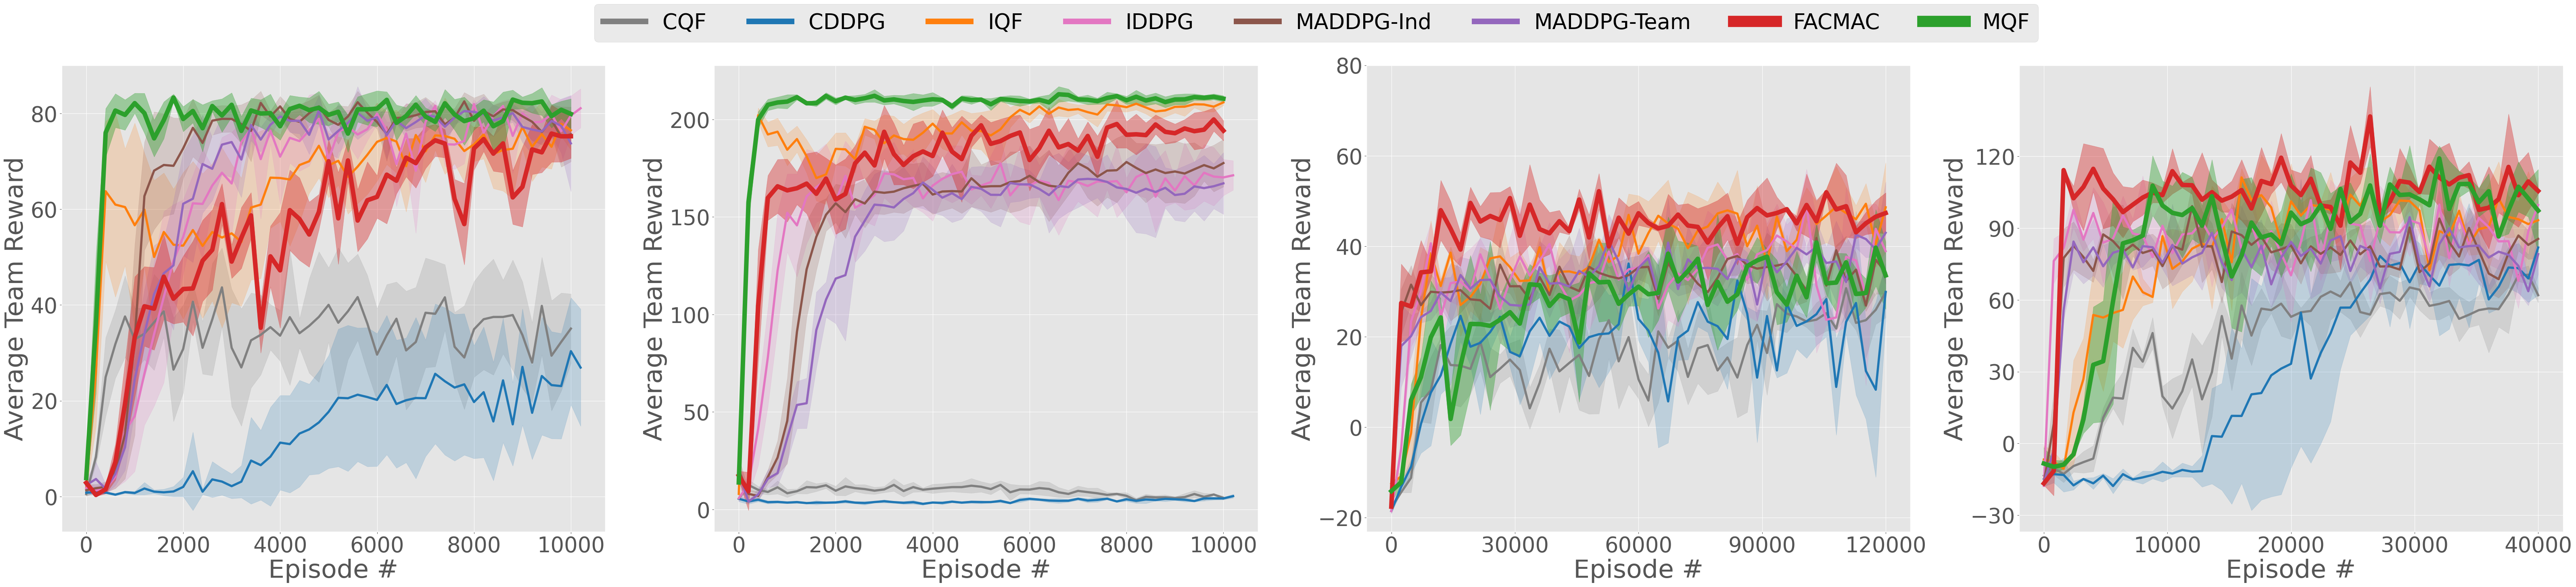

In [5]:

fig, ax = plt.subplots(1, 4, figsize=(80, 15))
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 38})

mix_keyword = 'mix_sum_run_1-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
ind_keyword = 'ind_run_1-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
cent_keyword = 'centralized_run_1-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
maddpg_keyword_50 = 'maddpg_run_50-step-update_r_type_episode-10000_lr0001_b512_l3_n256_m500000'
cddpg_keyword_10 = 'cddpg_run_10-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
iddpg_keyword_50 = 'iddpg_run_50-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
facmac = 'facmac_run_5-nb-update_episode-10000_lr001_b32_l3_n256_m500000'
nb_version = 5

_plot(ax[0], cent_keyword, _legends='CQF',
      runs=nb_version,
      _dir='2A2L', color='#808080')

_plot(ax[0], cddpg_keyword_10, _legends='CDDPG',
      runs=nb_version,
      _dir='2A2L', color='#1F77B4')

_plot(ax[0], ind_keyword, _legends='IQF',
      runs=nb_version,
      _dir='2A2L', color='#FF7F0E')

_plot(ax[0], iddpg_keyword_50, _legends='IDDPG',
      runs=nb_version,
      _dir='2A2L', color='#E377C2')

_plot(ax[0], maddpg_keyword_50.replace('r_type', 'individual-reward'),
      _legends='MADDPG-Ind', runs=nb_version,
      _dir='2A2L', color='#8C564B')

_plot(ax[0], maddpg_keyword_50.replace('r_type', 'team-reward'),
      _legends='MADDPG-Team', runs=nb_version,
      _dir='2A2L', color='#9467BD')

_plot(ax[0], facmac, _mod=5, stop_th=40,
      _legends='FACMAC', runs=nb_version,
      _dir='2A2L', color='#D62728',
      _linewidth=8, _alpha=0.4)

_plot(ax[0], mix_keyword, _legends='MQF',
      legend=True, runs=nb_version,
      _dir='2A2L', color='#2CA02C',
      _linewidth=8, _alpha=0.4)

print('---------------------------------------------------------')

mix_keyword = 'mix_sum_run_1-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
ind_keyword = 'ind_run_1-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
cent_keyword = 'centralized_run_1-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
maddpg_keyword_50 = 'maddpg_run_50-step-update_r_type_episode-10000_lr0001_b512_l3_n256_m500000'
cddpg_keyword_50 = 'cddpg_run_10-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
iddpg_keyword_50 = 'iddpg_run_50-step-update_func-polynomial_rank-2_episode-10000_lr0001_b512_l3_n256_m500000'
facmac = 'facmac_run_5-nb-update_episode-10000_lr001_b32_l3_n256_m500000'
nb_version = 5

_plot(ax[1], cent_keyword, _legends='CQF',
      runs=nb_version,
      _dir='5A5L', color='#808080')

_plot(ax[1], cddpg_keyword_50, _legends='CDDPG',
      runs=nb_version,
      _dir='5A5L', color='#1F77B4')

_plot(ax[1], ind_keyword, _legends='IQF',
      runs=nb_version,
      _dir='5A5L', color='#FF7F0E')

_plot(ax[1], iddpg_keyword_50, _legends='IDDPG',
      runs=nb_version,
      _dir='5A5L', color='#E377C2')

_plot(ax[1], maddpg_keyword_50.replace('r_type', 'individual-reward'),
      _legends='MADDPG-Ind',  runs=nb_version,
      _dir='5A5L', color='#8C564B')

_plot(ax[1], maddpg_keyword_50.replace('r_type', 'team-reward'),
      _legends='MADDPG-Team', runs=nb_version,
      _dir='5A5L', color='#9467BD')

_plot(ax[1], facmac, _mod=5, stop_th=40,
      _legends='FACMAC', runs=nb_version,
      _dir='5A5L', color='#D62728', _linewidth=8, _alpha=0.4)

_plot(ax[1], mix_keyword, _legends='MQF',
      runs=nb_version,
      _dir='5A5L', color='#2CA02C', _linewidth=8, _alpha=0.4)

print('---------------------------------------------------------')

mix_keyword = 'mix_sum_run_50-step-update_func-polynomial_rank-2_episode-120000_lr0001_b512_l3_n256_m500000'
ind_keyword = 'ind_run_50-step-update_func-polynomial_rank-2_episode-120000_lr0001_b512_l3_n256_m500000'
cent_keyword = 'centralized_run_50-step-update_func-polynomial_rank-2_episode-120000_lr0001_b512_l3_n256_m500000'
maddpg_keyword_50 = 'maddpg_run_50-step-update_r_type_episode-120000_lr0001_b512_l3_n256_m500000'
cddpg_keyword_10 = 'cddpg_run_10-step-update_func-polynomial_rank-2_episode-120000_lr0001_b512_l3_n256_m500000'
iddpg_keyword_50 = 'iddpg_run_50-step-update_func-polynomial_rank-2_episode-120000_lr0001_b512_l3_n256_m500000'
facmac = 'facmac_run_1-nb-update_episode-120000_lr001_b32_l3_n256_m500000'
nb_version = 3

_mod=12
_plot(ax[2], cent_keyword, _legends='CQF', _mod=_mod,
      runs=nb_version,
      _dir='S-PP', color='#808080')

_plot(ax[2], cddpg_keyword_10, _legends='CDDPG', _mod=_mod,
      runs=nb_version,
      _dir='S-PP', color='#1F77B4')

_plot(ax[2], ind_keyword, _legends='IQF', _mod=_mod,
      runs=nb_version,
      _dir='S-PP', color='#FF7F0E')

_plot(ax[2], iddpg_keyword_50, _legends='IDDPG', _mod=_mod,
      runs=nb_version,
      _dir='S-PP', color='#E377C2')

_plot(ax[2], maddpg_keyword_50.replace('r_type', 'individual-reward'), _legends='MADDPG-Ind',
     _mod=_mod,
      runs=nb_version,
      _dir='S-PP', color='#8C564B')

_plot(ax[2], maddpg_keyword_50.replace('r_type', 'team-reward'), legend=False, _mod=_mod,
      _legends='MADDPG-Team', runs=nb_version,
      _dir='S-PP', color='#9467BD')

_plot(ax[2], facmac, _mod=60, stop_th=40, _legends='FACMAC',
      runs=nb_version,
      _dir='S-PP', color='#D62728', _linewidth=8, _alpha=0.4)

_plot(ax[2], mix_keyword, _legends='MQF', _mod=_mod,
      runs=nb_version, yticks=[-20, 0, 20, 40, 60, 80],
      xticks=[0, 30000, 60000, 90000, 120000],
      _dir='S-PP', color='#2CA02C', _linewidth=8, _alpha=0.4)

print('---------------------------------------------------------')

mix_keyword = 'mix_sum_run_50-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
ind_keyword = 'ind_run_50-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
cent_keyword = 'centralized_run_50-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
maddpg_keyword_50 = 'maddpg_run_50-step-update_r_type_episode-40000_lr0001_b512_l3_n256_m500000'
cddpg_keyword_50 = 'cddpg_run_50-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
iddpg_keyword_10 = 'iddpg_run_10-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
facmac = 'facmac_run_1-nb-update_episode-40000_lr001_b32_l3_n256_m500000'

_plot(ax[3], cent_keyword, _legends='CQF', _mod=4,
      runs=nb_version,
      _dir='IC-PP', color='#808080')

_plot(ax[3], cddpg_keyword_50, _legends='CDDPG', _mod=4,
      runs=nb_version,
      _dir='IC-PP', color='#1F77B4')

_plot(ax[3], ind_keyword, _legends='IQF', _mod=4,
      runs=nb_version,
      _dir='IC-PP', color='#FF7F0E')

_plot(ax[3], iddpg_keyword_10, _legends='IDDPG', _mod=4,
      runs=nb_version,
      _dir='IC-PP', color='#E377C2')

_plot(ax[3], maddpg_keyword_50.replace('r_type', 'individual-reward'), _legends='MADDPG-Ind',
      _mod=4,
      runs=nb_version,
      _dir='IC-PP', color='#8C564B')

_plot(ax[3], maddpg_keyword_50.replace('r_type', 'team-reward'), _legends='MADDPG-Team', _mod=4,
      runs=nb_version,
      _dir='IC-PP', color='#9467BD')

_plot(ax[3], facmac, _mod=20, stop_th=40, _legends='FACMAC',
      runs=nb_version,
      _dir='IC-PP', color='#D62728', _linewidth=8, _alpha=0.4)

_plot(ax[3], mix_keyword, _legends='MQF', _mod=4,
      runs=nb_version, yticks=[-30, 0, 30, 60, 90, 120],
      _dir='IC-PP', color='#2CA02C', _linewidth=8, _alpha=0.4)


In [8]:
fig.savefig('fig-1.svg')